In [ ]:
//Install cassandra driver for python to run following commands
//pip install cassandra-driver

In [1]:
from cassandra import ConsistencyLevel
from cassandra.cluster import Cluster, BatchStatement
from cassandra.query import SimpleStatement

In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
cluster = Cluster(['localhost'])
session = cluster.connect('textanlyz_space')

In [4]:
count_row = session.execute('select count(*) from txt_anlyz_stats;')

In [5]:
##count total no of records
count_row.one().count

36502

In [6]:
rows = session.execute('select * from txt_anlyz_stats;')

In [7]:
rowsDF = pd.DataFrame(list(rows))

In [8]:
#Replace sentiments with numeric
# 0 -> Positive
# 1 -> Negative
# 2 -> Neutral
rowsDF.replace(['positive','negative','neutral'],[0,1,2],inplace=True)

In [9]:
rowsDF.head()

,id,date,formatted_text,sentiment,text_data
0,2052249055,Sat Jun 06 00:06:46 PDT 2009,It's early but it was fun while it lasted dan...,0,It's early but it was fun while it lasted dan...
1,1999729202,Mon Jun 01 20:43:07 PDT 2009,i can't believe my nicky turkey is all grown u...,1,i can't believe my nicky turkey is all grown u...
2,1981881032,Sun May 31 10:04:54 PDT 2009,oohhhh twitter......i guess i have to wash clo...,1,oohhhh twitter......i guess i have to wash clo...
3,1981680777,Sun May 31 09:40:08 PDT 2009,Going to see Doug cause I'm bored. Can't figur...,1,Going to see Doug cause I'm bored. Can't figur...
4,1995893781,Mon Jun 01 14:12:45 PDT 2009,@SCRUFFYSMOMMY jesssssssica!!! i hope your hea...,0,@SCRUFFYSMOMMY jesssssssica!!! i hope your hea...


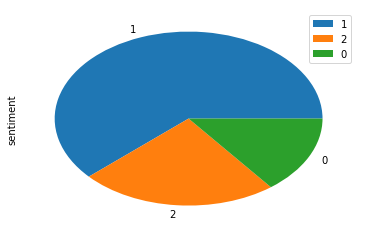

In [10]:
rowsDF['sentiment'].value_counts().plot(kind = 'pie',legend=True)

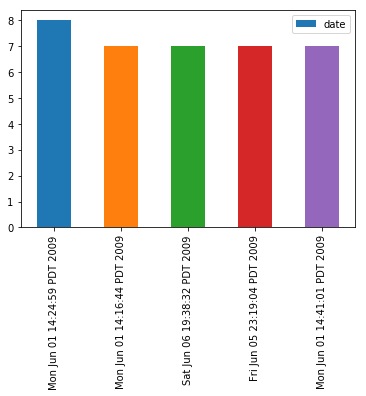

In [11]:
#top 5 days with most tweets
rowsDF['date'].value_counts(sort=True)[:5].plot(kind='bar',x = 'date' , y = 'count',legend=True)

In [12]:
##Every user id associated with only one tweet
rowsDF['id'].unique().size

36502

In [13]:
text = " ".join(t for t in rowsDF['text_data'])

In [14]:
wordcloud = WordCloud(background_color="white").generate(text)

In [ ]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()